I - Portfolio Allocation - US Equity

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Données du benchmark
nasdaq = yf.download('^IXIC', start='2022-01-01', end='2024-01-01')

# test de téléchargement - tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 
    'NVDA', 'TSLA', 'ADBE', 'PEP', 'COST', 'AVGO',
    'TXN', 'QCOM', 'AMD', 'HON', 'INTU', 'AMAT', 
    'SBUX', 'MU', 'LRCX', 'INTC', 'AMGN', 'CSCO',
    'BKNG', 'ISRG', 'CMCSA', 'ARM', 'VRTX', 
    'REGN', 'ADP', 'ADI', 'KLAC', 'PANW', 'GILD', 
    'MELI', 'MDLZ', 'ABNB', 'SNPS', 'CTAS', 'CDNS', 
    'CSX', 'ORLY', 'PYPL', 'NXPI', 'MAR', 'CEG', 
    'CRWD', 'WDAY', 'ROP', 'MNST', 'AEP', 'CHTR', 
    'MRVL', 'DASH', 'ADSK', 'PCAR', 'CPRT', 'KDP', 
    'ROST', 'PAYX', 'ODFL', 'FTNT', 'KHC', 'TTD', 
    'MCHP', 'EA', 'IDXX', 'FAST', 'GEHC', 'PDD', 
    'ASML', 'AZN', 'EXC'
]

data = yf.download(tickers, start='2022-01-01', end='2024-01-01')
print(nasdaq.head())
print(data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  73 of 73 completed


                    Open          High           Low         Close  \
Date                                                                 
2022-01-03  15732.500000  15832.799805  15644.089844  15832.799805   
2022-01-04  15852.139648  15852.139648  15512.410156  15622.719727   
2022-01-05  15547.160156  15586.299805  15095.179688  15100.169922   
2022-01-06  15024.150391  15198.450195  14914.870117  15080.860352   
2022-01-07  15095.719727  15171.019531  14877.629883  14935.900391   

               Adj Close      Volume  
Date                                  
2022-01-03  15832.799805  4429960000  
2022-01-04  15622.719727  5131110000  
2022-01-05  15100.169922  5031850000  
2022-01-06  15080.860352  4790820000  
2022-01-07  14935.900391  4238070000  
Price        Adj Close                                                  \
Ticker            AAPL        ABNB        ADBE         ADI         ADP   
Date                                                                     
2022-01-03  17

In [44]:
# Préparation des données - Perf

nasdaq['Daily Return'] = nasdaq['Adj Close'].pct_change()
returns = data['Adj Close'].pct_change() # Calcule les rendements quotidiens des composants
print(nasdaq['Daily Return'].head())
print(returns.head())

Date
2022-01-03         NaN
2022-01-04   -0.013269
2022-01-05   -0.033448
2022-01-06   -0.001279
2022-01-07   -0.009612
Name: Daily Return, dtype: float64
Ticker          AAPL      ABNB      ADBE       ADI       ADP      ADSK  \
Date                                                                     
2022-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2022-01-04 -0.012692 -0.010887 -0.018374 -0.009032  0.004672 -0.019491   
2022-01-05 -0.026600 -0.050059 -0.071426 -0.015437 -0.008525 -0.049858   
2022-01-06 -0.016693 -0.015408 -0.000603  0.003182 -0.006871 -0.000795   
2022-01-07  0.000988  0.039437 -0.006652 -0.026241 -0.010564 -0.006777   

Ticker           AEP      AMAT       AMD      AMGN  ...      REGN       ROP  \
Date                                                ...                       
2022-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2022-01-04  0.000451 -0.009817 -0.038738  0.005073  ... -0.016393 -0.010127   
2022-01-05

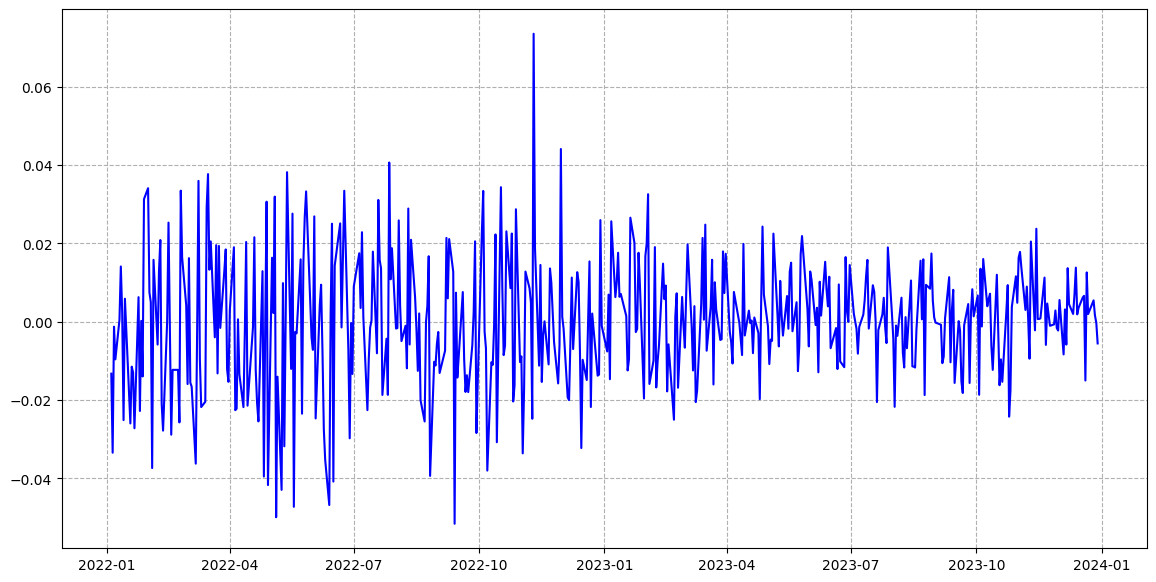

In [45]:
# Visualisation des perfs du benchmark

plt.figure(figsize=(14, 7))
plt.grid(True, linestyle ='--')
plt.plot(nasdaq.index, nasdaq['Daily Return'], label='Nasdaq', color = 'blue')

II - Construction du portefeuille équipondéré

In [46]:
# Pour des questions méthodologiques, on utilisera une perf cumulée rebasée en base 100

nasdaq['Daily Return'] = nasdaq['Adj Close'].pct_change() #perf du benchmark
returns = data['Adj Close'].pct_change() #perfs des titres inclus dans le benchmark

# Rendements quotidiens du portefeuille équipondéré
returns['Portfolio'] = returns.mean(axis=1)
nasdaq['Cumulative Return'] = (1 + nasdaq['Daily Return']).cumprod() # Valeur cumulée du Nasdaq (base 100)
returns['Cumulative Portfolio'] = (1 + returns['Portfolio']).cumprod() # Valeur cumulée du portefeuille (base 100)

# Rebasement des indices en base 100
nasdaq_base_100 = 100 * nasdaq['Cumulative Return'] / nasdaq['Cumulative Return'].iloc[1]
portfolio_base_100 = 100 * returns['Cumulative Portfolio'] / returns['Cumulative Portfolio'].iloc[1]

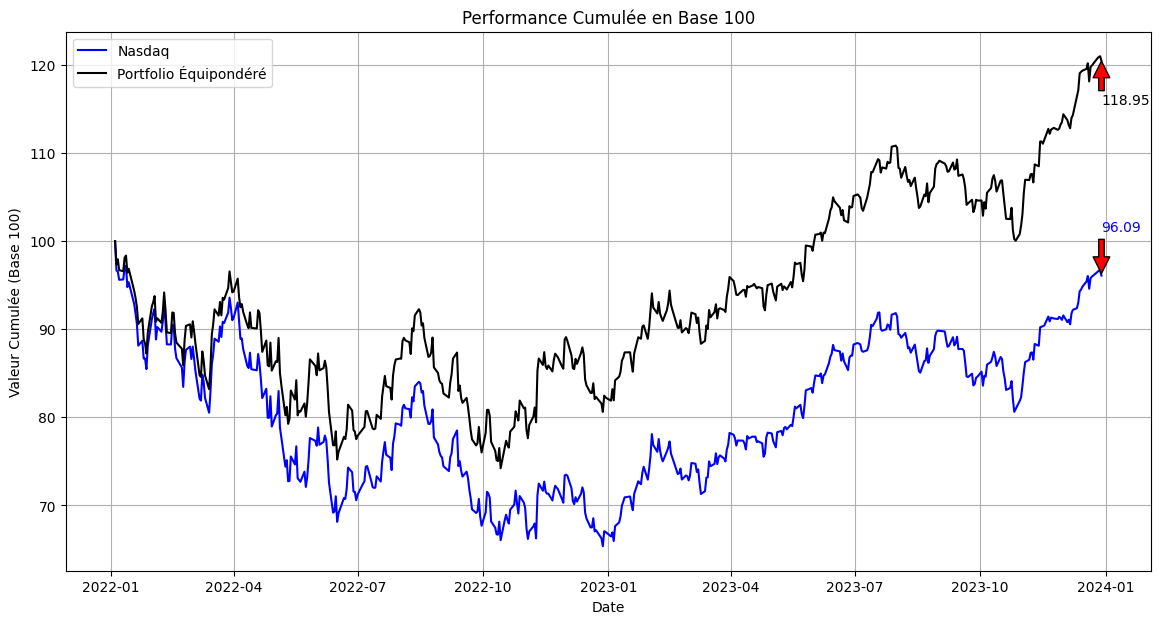

In [47]:
# Plot 

plt.figure(figsize=(14, 7))

plt.plot(nasdaq.index, nasdaq_base_100, label='Nasdaq', color='blue')
plt.plot(returns.index, portfolio_base_100, label='Portfolio Équipondéré', color='black')

# Annoter les valeurs finales
plt.annotate(f'{final_value_nasdaq:.2f}', (nasdaq.index[-1], nasdaq_base_100.iloc[-1]), 
             xytext=(nasdaq.index[-1], nasdaq_base_100.iloc[-1] + 5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             color='blue')

plt.annotate(f'{final_value_portfolio:.2f}', (returns.index[-1], portfolio_base_100.iloc[-1]), 
             xytext=(returns.index[-1], portfolio_base_100.iloc[-1] - 5),
             arrowprops=dict(facecolor='red', shrink=0.01),
             color='black')

plt.title('Performance Cumulée en Base 100')
plt.xlabel('Date')
plt.ylabel('Valeur Cumulée (Base 100)')
plt.legend()
plt.grid(True)
plt.show()

Période d'étude : 01/2022 - 01/2024

Le rebalancement en poids par équipondération a permis à notre portefeuille de surperformer l'indice de référence, le Nasdaq. La gestion indicielle classique consiste à répliquer la composition du marché (ici, le Nasdaq) en détenant les 100 titres contenus dans l'indice, en respectant les poids selon la capitalisation boursière. Cette forme d'allocation peut être avantageuse lorsque les entreprises les plus importantes en termes de poids ont un impact positif sur la performance globale. Cependant, cela peut nuire à la performance en ne laissant pas le potentiel de croissance des autres entreprises s'exprimer pleinement, car celles-ci sont limitées par leur poids moindre.

Pour pallier ce problème, l'allocation par équipondération permet d'établir une équité en termes de poids entre tous les titres. En effet, cette méthode de gestion vise à allouer le même poids à chaque titre, ce qui permet de lisser le risque du portefeuille et, dans notre cas, d'accroître sa performance. Cette approche favorise une distribution plus équilibrée des rendements potentiels, offrant ainsi une meilleure opportunité de croissance pour toutes les entreprises du portefeuille, indépendamment de leur taille ou de leur capitalisation boursière.

III - Métriques approfondis du portefeuille

In [48]:
# Evaluons la sous/surperformance de notre portefeuille par rapport au bench

# Différence en termes de valeur à la fin de la période
final_value_nasdaq = nasdaq_base_100.iloc[-1]
final_value_portfolio = portfolio_base_100.iloc[-1]
surperformance = final_value_portfolio - final_value_nasdaq #ici on suppose que c'est une superformance (voir graph) sinon renommée la variable en sous-perf

print(f"Valeur finale du Nasdaq (base 100): {final_value_nasdaq:.2f}")
print(f"Valeur finale du portefeuille équipondéré (base 100): {final_value_portfolio:.2f}")
print(f"Surperformance du portefeuille par rapport au Nasdaq : {surperformance:.2f} points")

Valeur finale du Nasdaq (base 100): 96.09
Valeur finale du portefeuille équipondéré (base 100): 120.47
Surperformance du portefeuille par rapport au Nasdaq : 24.38 points


In [49]:
# Métriques

# Rendement quotidien moyen
mean_daily_return_nasdaq = nasdaq['Daily Return'].mean()
mean_daily_return_portfolio = returns['Portfolio'].mean()

# Volatilité quotidienne
daily_volatility_nasdaq = nasdaq['Daily Return'].std()
daily_volatility_portfolio = returns['Portfolio'].std()

# Rendement annuel moyen
annual_mean_return_nasdaq = mean_daily_return_nasdaq * 252
annual_mean_return_portfolio = mean_daily_return_portfolio * 252

# Volatilité annuelle
annual_volatility_nasdaq = daily_volatility_nasdaq * np.sqrt(252)
annual_volatility_portfolio = daily_volatility_portfolio * np.sqrt(252)

# Sharpe Ratio
risk_free_rate = 0.035  # Taux sans risque annuel
sharpe_ratio_nasdaq = (annual_mean_return_nasdaq - risk_free_rate) / annual_volatility_nasdaq
sharpe_ratio_portfolio = (annual_mean_return_portfolio - risk_free_rate) / annual_volatility_portfolio

# Maximum Drawdown (MDD)
def max_drawdown(return_series):
    cumulative = (1 + return_series).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

max_drawdown_nasdaq = max_drawdown(nasdaq['Daily Return'])
max_drawdown_portfolio = max_drawdown(returns['Portfolio'])

In [50]:
# Visualition des métriques du portefeuilles 

metrics = {
    '': ['Annual Mean Return', 'Annual Volatility', 'Sharpe Ratio', 'Maximum Drawdown'],
    'Benchmark': [annual_mean_return_nasdaq, annual_volatility_nasdaq, sharpe_ratio_nasdaq, max_drawdown_nasdaq],
    'Portfolio': [annual_mean_return_portfolio, annual_volatility_portfolio, sharpe_ratio_portfolio, max_drawdown_portfolio]
} #dataframe

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

                       Benchmark  Portfolio
0  Annual Mean Return   0.006438   0.118594
1   Annual Volatility   0.258197   0.246987
2        Sharpe Ratio  -0.110619   0.338455
3    Maximum Drawdown  -0.346254  -0.257744


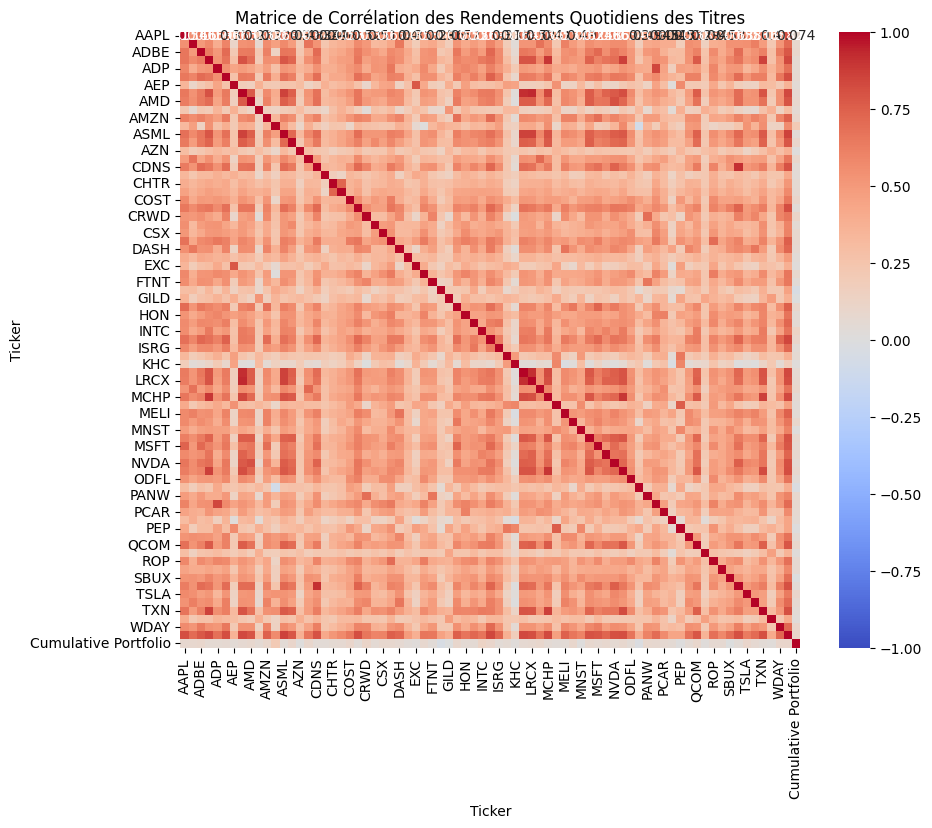

In [52]:
correlation_matrix = returns.corr()

# heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation des Rendements Quotidiens des Titres')
plt.show()

D:\Python\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


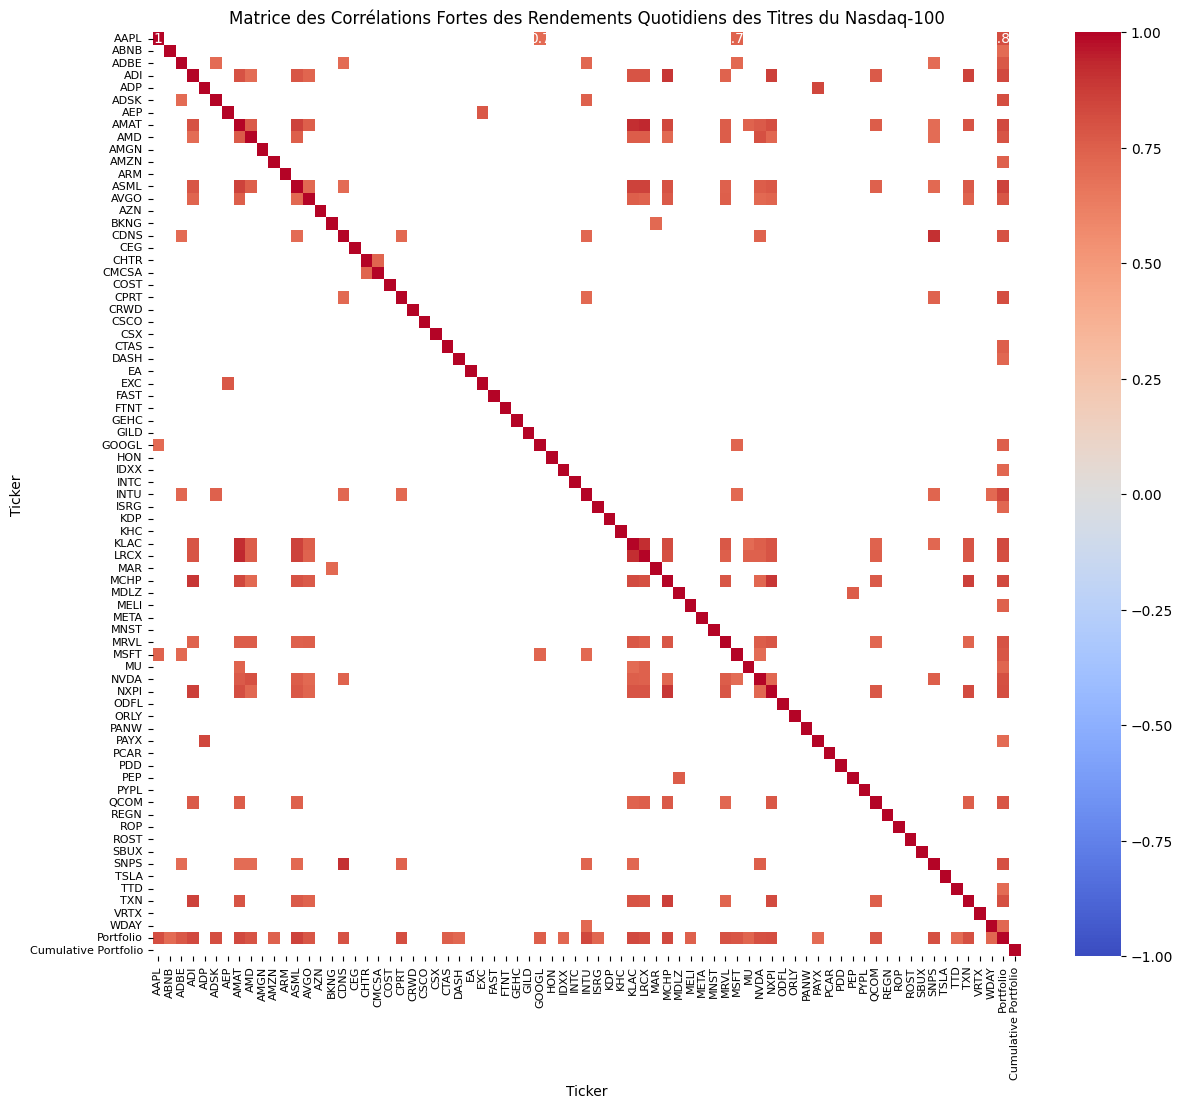

In [53]:
# Graphique illisible, on va regroupper les corrélations par typologie 

threshold = 0.7 # Seuil pour les corrélations fortes
strong_correlations = correlation_matrix[correlation_matrix.abs() > threshold] # Filtrer les corrélations fortes
# Afficher la heatmap des corrélations fortes
plt.figure(figsize=(14, 12))
sns.heatmap(strong_correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            xticklabels=1, yticklabels=1)
plt.title('Matrice des Corrélations Fortes des Rendements Quotidiens des Titres du Nasdaq-100')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

D:\Python\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


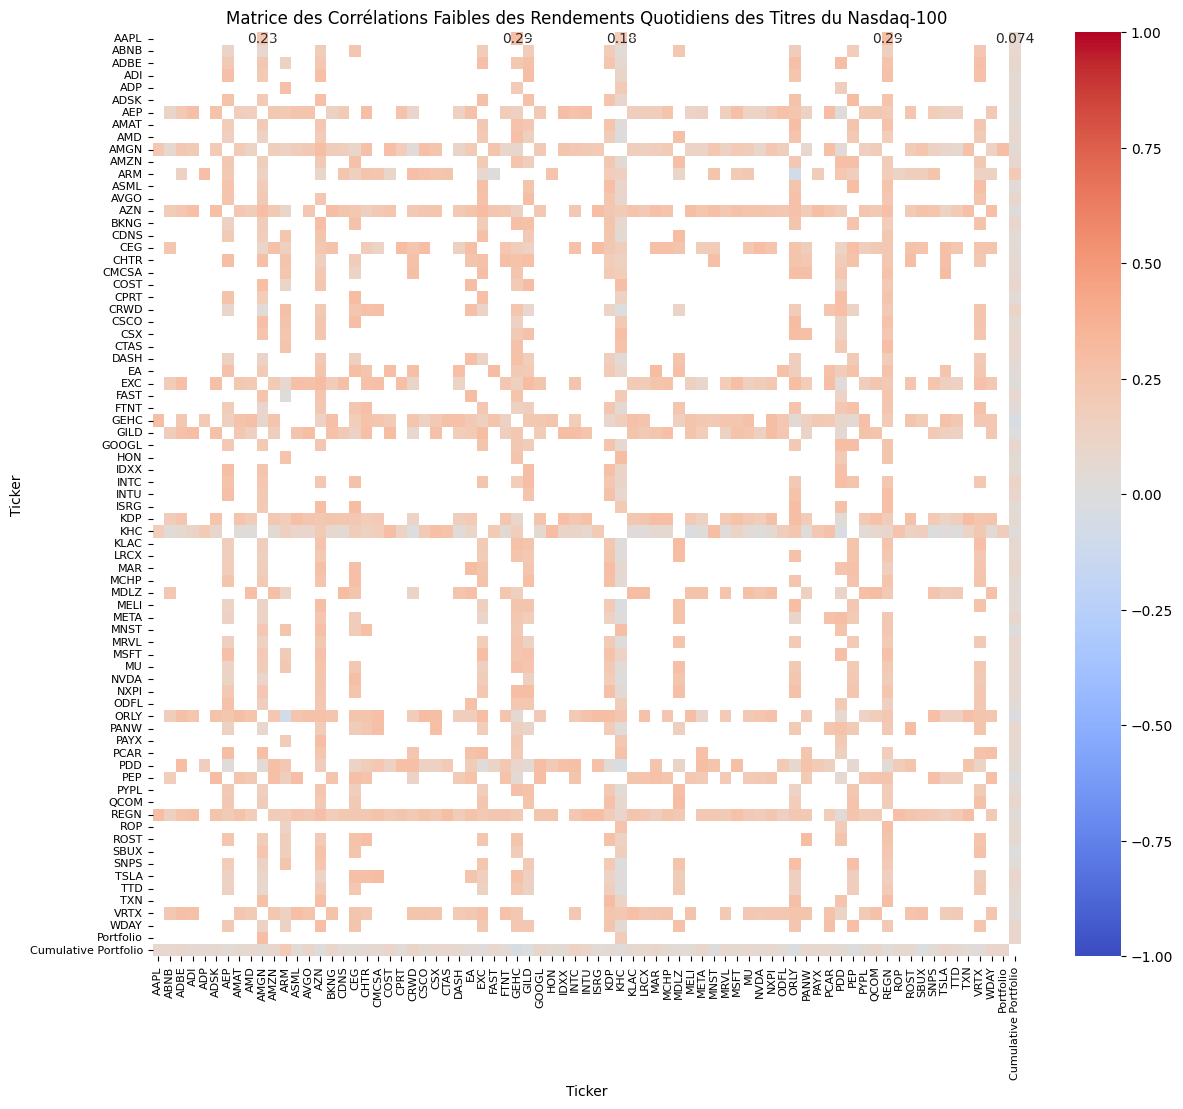

In [54]:
# Même chose pour les corrélations faibles

threshold_weak = à

weak_correlations = correlation_matrix[(correlation_matrix.abs() < threshold_weak) & (correlation_matrix.abs() > 0)]

plt.figure(figsize=(14, 12))
sns.heatmap(weak_correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            xticklabels=1, yticklabels=1)
plt.title('Matrice des Corrélations Faibles des Rendements Quotidiens des Titres du Nasdaq-100')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()